In [85]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython import display

In [86]:
%matplotlib notebook

## Conway's Game of Life

In this assignment we were introduced to the Agent-based model, called the Conway's Game of Life. This model takes a two-dimensional grid of square cells, which takes two possible states. To be precise we consider the state $\textit{live}$ and $\textit{dead}$. In the general concept we assume that there is an interaction with eight neighbours, and we have some general rules established.

In [87]:
def conway_game_of_life(grid):
    n, m = grid.shape
    newGrid = grid.copy()
    for i in range(n):
        for j in range(m):
            total = int((grid[i, (j-1) % m] + grid[i, (j+1) % m] +
                         grid[(i-1) % n, j] + grid[(i+1) % n, j] +
                         grid[(i-1) % n, (j-1) % m] + grid[(i-1) % n, (j+1) % m] +
                         grid[(i+1) % n, (j-1) % m] + grid[(i+1) % n, (j+1) % m]) / 255)
            if grid[i, j] == ON:
                if (total < 2) or (total > 3):
                    newGrid[i, j] = OFF
            else:
                if total == 3:
                    newGrid[i, j] = ON
    return newGrid

As we can see in the function $\textit{conway_game_of_life}$, which takes $\textit{grid}$ as an argument, there are some rules that I mentioned before. Firstly, we can state that the state $live$ would be assigned to $\textit{ON}$ and the state $\textit{dead}$ would be assigned to $\textit{OFF}$. 

For the random grid of square cells we take our $\textit{grid.shape}$ parameters $\textit{n, m}$ equal to $50$. State $\textit{ON}$ would be tagged with the white colour ($255$) and the other state with black ($0$).

In [88]:
n = 50
m = 50
ON = 255
OFF = 0

Here we have our random grid of square cells.

In [79]:
grid = np.random.choice([ON, OFF], n * m, p=[0.2, 0.8]).reshape(n, m)

After that we want to visualize it using the animation. For this purpose we are going to use the function $\textit{FuncAnimation}$. The function $\textit{update}$ is responsible for generating each frame of the animation. The line $\textit{img.set_array}$ updates the data of the image plot with the new state of the grid.

In [98]:
fig, ax = plt.subplots()
ax.set_xticks([])
ax.set_yticks([])
img = ax.imshow(grid, interpolation='nearest', cmap='gray')

def update(frame):
    global grid
    grid = conway_game_of_life(grid)
    img.set_array(grid)
    return [img]

ani = FuncAnimation(fig, update, frames=100, interval=100, blit=True)
ani.save('conway_game_of_life_random_grid.gif')

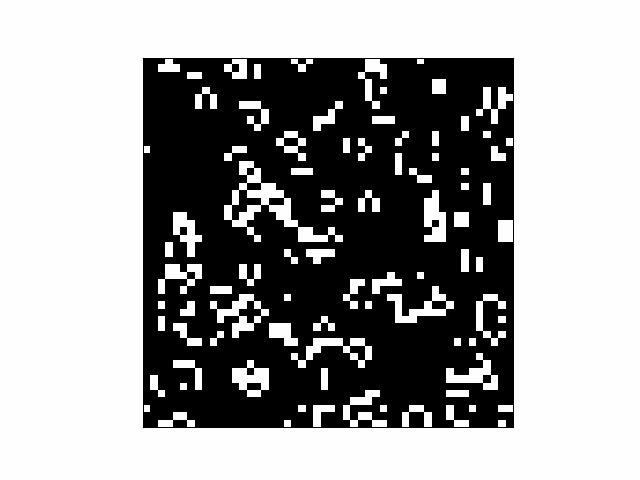

In [94]:
display.Image(open('conway_game_of_life_random_grid.gif', 'rb').read())

## Generating Lightweight spaceship 

First pattern, that I find interesting is the $\text{Lightweight spaceship}$. This is basically the smallest orthogonal spaceship and the second most common after the glider. In contrast to oscillators, which stay in one place and return to their original configuration after a certain number of generations, spaceships move across the grid in a particular direction. One interesting aspect of the $\text{Lightweight spaceship}$ is that it can be stabilized by gliders. When a glider collides with a $\text{Lightweight spaceship}$ in a certain way, it can create a stable pattern known as a "lightweight spaceship stabilizer." The $\text{Lightweight spaceship}$ is often used as a building block to create more complex patterns and structures. It is a fundamental component in many larger constructions.

In [55]:
grid_2 = np.loadtxt('lightweight_spaceship.txt')
grid_2 = grid_2 * 255

Below we can see how this pattern behaves at the animation.

In [100]:
fig_2, ax = plt.subplots()
ax.set_xticks([])
ax.set_yticks([])
img_2 = ax.imshow(grid_2, interpolation='nearest', cmap='gray')

def update_2(frame):
    global grid_2
    grid_2 = conway_game_of_life(grid_2)
    img_2.set_array(grid_2)
    return [img_2]

anim = FuncAnimation(fig_2, update_2, frames = 100, interval=200, blit=True)
anim.save('spaceship.gif')

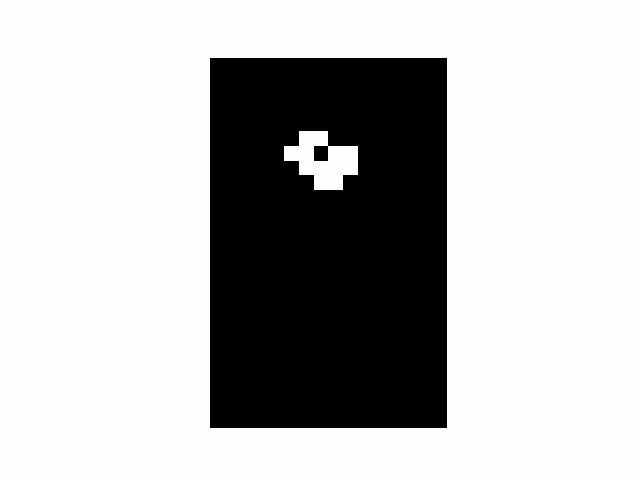

In [99]:
display.Image(open('spaceship.gif', 'rb').read())

## Generating tumbler

As the second interesting pattern I have chosen the tumbler. This is the smallest known $\text{period-14 oscilator}$, which means it takes $14$ generations for it to return to its original configuration. The tumbler's motion is complex and visually interesting. It appears to "tumble" back and forth between its two stable phases. The tumbler is composed of still life patterns (patterns that do not change over time) and blinkers (patterns that oscillate between two phases). This combination gives its unique oscillatory behavior. The tumbler has gained popularity in the field of recreational mathematics and has been a subject of fascination for hobbyists, mathematicians, and computer scientists alike.

In [82]:
grid_3 = np.loadtxt('tumbler.txt')
grid_3 = grid_3 * 255

The visualization of this pattern we can see below at the animation.

In [101]:
fig_3, ax = plt.subplots()
ax.set_xticks([])
ax.set_yticks([])
img_3 = ax.imshow(grid_3, interpolation='nearest', cmap='gray')

def update_3(frame):
    global grid_3
    grid_3 = conway_game_of_life(grid_3)
    img_3.set_array(grid_3)
    return [img_3]

animation = FuncAnimation(fig_3, update_3, frames = 100, interval=100, blit=True)
animation.save('tumbler.gif')


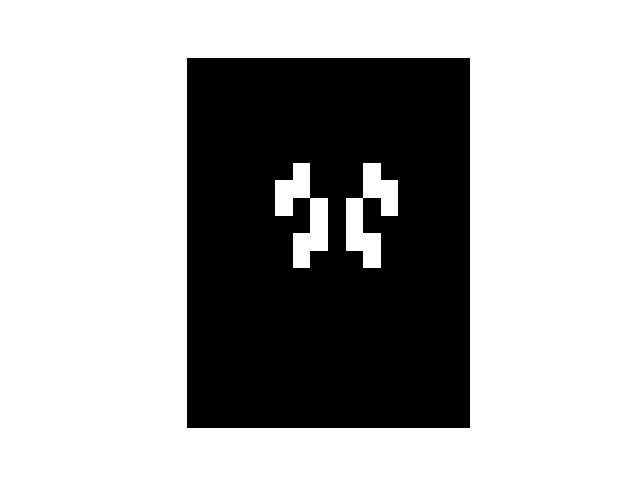

In [90]:
display.Image(open('tumbler.gif', 'rb').read())